**Sheet 1. problem statment(Gas turbines)**

In [36]:
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [38]:
tf.random.set_seed(14) 

In [39]:
forest=pd.read_csv("/content/forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
forest = forest.copy() 
forest.drop(forest.columns[11:30],axis=1,inplace = True)
forest.shape

(517, 12)

In [9]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [10]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [11]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [12]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [13]:
forest.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [14]:
forest.size_category.value_counts() 

small    378
large    139
Name: size_category, dtype: int64

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
forest.month= label_encoder.fit_transform(forest.month) 
forest.day= label_encoder.fit_transform(forest.day) 
forest.size_category= label_encoder.fit_transform(forest.size_category) 
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [16]:
from imblearn.combine import SMOTETomek
from collections import Counter
resamp = forest.copy()
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]
print(Counter(b))
smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)
print(Counter(b))

Counter({1: 378, 0: 139})
Counter({1: 369, 0: 369})


In [18]:
X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)
model = Sequential()
model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10)

Epoch 1/50
35/35 [==============================] - 2s 15ms/step - loss: 0.6889 - accuracy: 0.5565 - val_loss: 0.6850 - val_accuracy: 0.5556
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 0.6714 - accuracy: 0.6899 - val_loss: 0.6639 - val_accuracy: 0.6023
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 0.6221 - accuracy: 0.7710 - val_loss: 0.5722 - val_accuracy: 0.7193
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.5443 - accuracy: 0.7884 - val_loss: 0.5077 - val_accuracy: 0.6608
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4425 - accuracy: 0.8290 - val_loss: 0.3776 - val_accuracy: 0.8187
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3594 - accuracy: 0.8638 - val_loss: 0.2637 - val_accuracy: 0.9591
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.2682 - accuracy: 0.9217 - val_loss: 0.2333 - val_accuracy: 0.9708
Epoch 8/50
35/35 [=

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9910


In [20]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [21]:
hist_forest = pd.DataFrame(hist.history)
hist_forest["epoch"]=hist.epoch
hist_forest.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.064777,0.973913,0.022862,0.994152,45
46,0.030497,0.991304,0.083787,0.976608,46
47,0.041816,0.982609,0.021412,0.994152,47
48,0.042490,0.985507,0.028146,0.988304,48
49,0.034458,0.979710,0.025327,0.988304,49


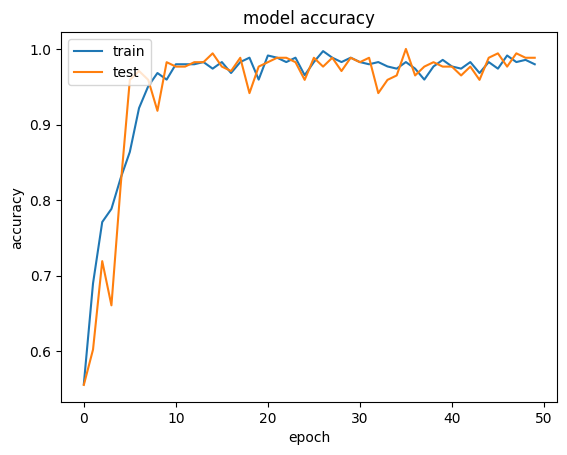

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

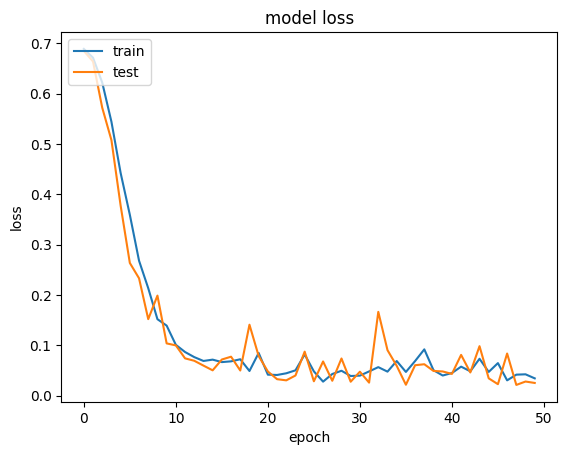

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [25]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [26]:
from keras.layers import Dropout
def create_model2(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 14,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
model2 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 20,epochs = 50)
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
param_grids2 = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
grid2 = GridSearchCV(estimator = model2,param_grid = param_grids2,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.993 total time=   4.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.980 total time=   6.3s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.959 total time=   6.4s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.980 total time=   6.5s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.986 total time=  12.6s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [27]:
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9864589095115661, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.979683768749237,0.011295361549161794 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9729361891746521,0.020025249080192157 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9674480438232422,0.017401616473958624 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9769534707069397,0.010154708352523833 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9810443043708801,0.012379419538978595 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9566096663475037,0.023339892036876246 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9864589095115661,0.0113007827303448 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9647913217544556,0.010767477456224875 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8723662376403809,0.12694169655831386 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [28]:
def create_model3(activation_function,init):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 14,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
model3 = KerasClassifier(build_fn = create_model3,verbose = 0,batch_size = 20,epochs = 50)
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
param_grids3 = dict(activation_function = activation_function,init = init)
grid3 = GridSearchCV(estimator = model3,param_grid = param_grids3,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   6.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.696 total time=   3.7s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.405 total time=   6.1s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   6.9s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   6.2s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [29]:
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9864589095115661, using {'activation_function': 'tanh', 'init': 'uniform'}
0.32503217458724976,0.2810128595148896 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.3712171256542206,0.2667501076868114 with: {'activation_function': 'softmax', 'init': 'normal'}
0.3196175813674927,0.27751758889058015 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9715388655662537,0.01565606014865896 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9796745777130127,0.015997345405961483 with: {'activation_function': 'relu', 'init': 'normal'}
0.20170068144798278,0.1858069525727854 with: {'activation_function': 'relu', 'init': 'zero'}
0.9864589095115661,0.01416874377091113 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9851075649261475,0.013773959240309502 with: {'activation_function': 'tanh', 'init': 'normal'}
0.20170068144798278,0.1858069525727854 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9837562084197998,0.016320110718681422 with: {'activa

In [30]:
def create_model4(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
model4 = KerasClassifier(build_fn = create_model4,verbose = 0,batch_size = 20,epochs = 50)
neuron1 = [4,8,14]
neuron2 = [4,8,12]
param_grids4 = dict(neuron1 = neuron1,neuron2 = neuron2)
grid4 = GridSearchCV(estimator = model4,param_grid = param_grids4,cv = KFold(),verbose = 10)
grid_result4 = grid4.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.993 total time=   6.2s
[CV 2/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.939 total time=   3.5s
[CV 3/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.953 total time=   3.6s
[CV 4/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.946 total time=   7.8s
[CV 5/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.673 total time=   3.5s
[CV 1/5; 2/9] START neuron1=4, neuron2=8........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=8;,

In [31]:
print('Best : {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))
means4 = grid_result4.cv_results_['mean_test_score']
stds4 = grid_result4.cv_results_['std_test_score']
params4 = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means4, stds4, params4):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9823772788047791, using {'neuron1': 14, 'neuron2': 8}
0.9008365392684936,0.1152368595867512 with: {'neuron1': 4, 'neuron2': 4}
0.9497334003448487,0.04487686461095063 with: {'neuron1': 4, 'neuron2': 8}
0.9483452796936035,0.07053107761538616 with: {'neuron1': 4, 'neuron2': 12}
0.9538793921470642,0.044149666348891246 with: {'neuron1': 8, 'neuron2': 4}
0.9728534698486329,0.015540927329494686 with: {'neuron1': 8, 'neuron2': 8}
0.9728626489639283,0.014912645066241029 with: {'neuron1': 8, 'neuron2': 12}
0.9715113043785095,0.02992546925249515 with: {'neuron1': 14, 'neuron2': 4}
0.9823772788047791,0.011804219246562532 with: {'neuron1': 14, 'neuron2': 8}
0.9783324241638184,0.011608856572834737 with: {'neuron1': 14, 'neuron2': 12}


Hyperparameters all at once

The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We may have missed the best values. The performance can be further improved by finding the optimum values of hyperparameters all at once given by the code snippet below.

This process is computationally expensive.

In [41]:
def create_model_fnl():
    model = Sequential()
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.001) 
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
model_fnl = KerasClassifier(build_fn = create_model_fnl,verbose = 0,batch_size = 20,epochs = 50)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_standardized,Y, test_size = 0.3)
hist2 = model_fnl.fit(X_train_1,y_train_1)

In [43]:
def report_model(model):
    model_preds = model.predict(X_test_1)
    print(confusion_matrix(y_test_1,model_preds))
    print(classification_report(y_test_1,model_preds))
report_model(model_fnl)

7/7 [==============================] - 0s 2ms/step
[[ 93  16]
 [  0 113]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       109
           1       0.88      1.00      0.93       113

    accuracy                           0.93       222
   macro avg       0.94      0.93      0.93       222
weighted avg       0.94      0.93      0.93       222



**Sheet 2. problem statment(Gas turbines)**

In [44]:
raw = pd.read_csv("/content/gas_turbines.csv")
raw.head() 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [45]:
gas = raw.copy() 
gas = gas.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
gas.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [46]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [47]:
gas.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


In [50]:
X1 = gas.iloc[:,:-1]
Y1 = gas.iloc[:,-1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y1, test_size = 0.3)
#A common mistake when configuring a neural network is to first normalize the data before splitting the data.

y1_train=np.reshape(y1_train.to_numpy(), (-1,1)) 
y1_test=np.reshape(y1_test.to_numpy(), (-1,1)) 
from sklearn.preprocessing import MinMaxScaler

scaler_x1 = MinMaxScaler()
scaler_y1 = MinMaxScaler()

print(scaler_x1.fit(X1_train))
x1train_scale=scaler_x1.transform(X1_train)

print(scaler_x1.fit(X1_test))
x1test_scale=scaler_x1.transform(X1_test)

print(scaler_y1.fit(y1_train))
y1train_scale=scaler_y1.transform(y1_train)

print(scaler_y1.fit(y1_test))
y1test_scale=scaler_y1.transform(y1_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [51]:
len(x1train_scale)

10527

In [52]:
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
hist1 = model1.fit(x1train_scale, y1train_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 1s 10ms/step - loss: 0.0734 - mse: 0.0734 - mae: 0.2074 - val_loss: 0.0461 - val_mse: 0.0461 - val_mae: 0.1584
Epoch 2/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1497 - val_loss: 0.0457 - val_mse: 0.0457 - val_mae: 0.1524
Epoch 3/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0448 - mse: 0.0448 - mae: 0.1511 - val_loss: 0.0460 - val_mse: 0.0460 - val_mae: 0.1534
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1496 - val_loss: 0.0457 - val_mse: 0.0457 - val_mae: 0.1511
Epoch 5/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0448 - mse: 0.0448 - mae: 0.1494 - val_loss: 0.0457 - val_mse: 0.0457 - val_mae: 0.1520
Epoch 6/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0449 - mse: 0.0449 - mae: 0.1524 - val_loss: 0.0462 - val_mse: 0.0462 - val_mae: 0.1600
Epoch 7/100
48/48 [==

In [ ]:
model1.summary() 

In [54]:
y1_predict = model1.predict(x1test_scale)

141/141 [==============================] - 1s 3ms/step


In [55]:
print(hist1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [56]:
hist1_gas = pd.DataFrame(hist1.history)
hist1_gas["epoch"]=hist1.epoch
hist1_gas.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.044626,0.044626,0.149014,0.045774,0.045774,0.154928,95
96,0.044827,0.044827,0.151123,0.045654,0.045654,0.152271,96
97,0.044585,0.044585,0.149335,0.045981,0.045981,0.154120,97
98,0.044746,0.044746,0.150526,0.045770,0.045770,0.151898,98
99,0.045016,0.045016,0.153183,0.045640,0.045640,0.151164,99


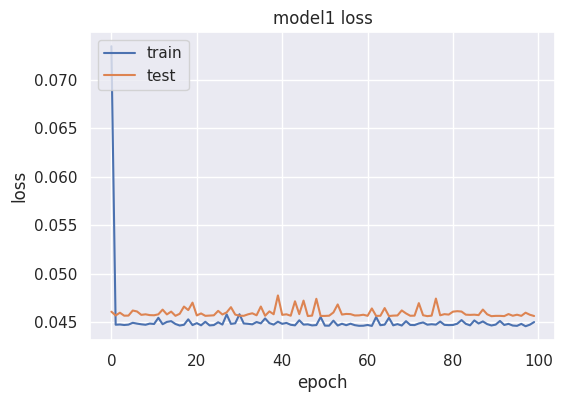

In [57]:
sns.set(rc={'figure.figsize':(6,4)})
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

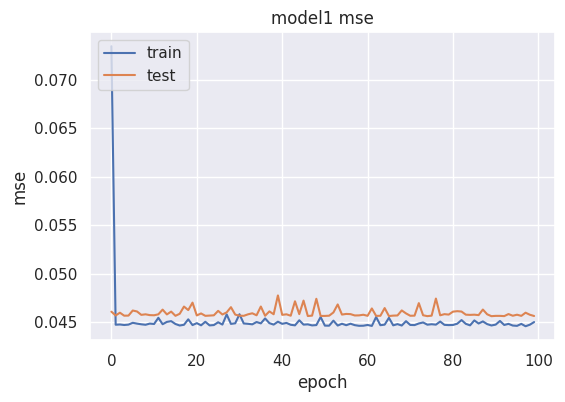

In [58]:
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 